In [2]:
import pandas as pd
import numpy as np

#Creando DATAFRAME desde un ARCHIVO csV

df_boston= pd.read_csv("Boston House Prices.csv")

df_boston



,Rooms,Distance,Value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2
...,...,...,...
501,6.593,2.4786,22.4
502,6.120,2.2875,20.6
503,6.976,2.1675,23.9
504,6.794,2.3889,22.0


In [3]:
df_boston.describe()


,Rooms,Distance,Value
count,506.000000,506.000000,506.000000
mean,6.284634,3.795043,22.532806
std,0.702617,2.105710,9.197104
min,3.561000,1.129600,5.000000
25%,5.885500,2.100175,17.025000
50%,6.208500,3.207450,21.200000
75%,6.623500,5.188425,25.000000
max,8.780000,12.126500,50.000000


<AxesSubplot:xlabel='Rooms', ylabel='Value'>

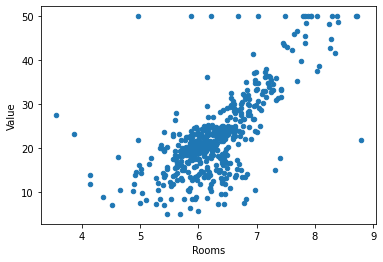

In [7]:
#Regresion Lineal (algoritmo para modelar la relacion entre dos variales o mas)
 
#Regresion Linel simple entre dos variables (1 predictor VAriable independiete --- ouput Objetivo Traget resultado dependiente) Y=ax+b

#Para el ejemplo se asume una relacion entre el numero de cuartos de la propiedad y su valorizacion

#usando Statsmodels

import statsmodels.api as sm

#paso1 definir las variables dependientes e independiente

y=df_boston['Value']  # variable dependiete Axis Y
x=df_boston['Rooms']  # variables independiente o predictor axis X

#Explorando el Dataset

df_boston.plot(kind='scatter',x='Rooms',y='Value') # Crea Grafico de dispersion



In [9]:
## Creando la Regresion

##Agregando la Constante b

x=sm.add_constant(x) ## agregando la constanta a la variable independienten

## Ajustamdo el modelo
lm = sm.OLS(y,x).fit() ## lm lineal model  metodo para ajustar 

lm.predict(x) ## Hacemos la prediccion usando la variable independiente


C:\Users\sobri\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64

In [10]:
## La tabla de regresion

lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           2.49e-74
Time:                        13:04:40   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
Rooms          9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analisis 
indica que la Variable dependiente es VALUE, el R-squared va de 0 a 1, si es proximo a 0 no explica la variabilidad de la data por el contrario si es 1 explica totalmente la variabilidad.

Valores Importantes Coef de la constante y de la variable independiente Rooms
std err t y Pt

In [11]:
##Ecuacion de la Regresion Lineal

## Coeficiente de la Constante =-34.6706  (es b)
## Coeficiente de la Var Ind Rooms = 9.1021  (es a)
## Ecuacion lineal y=ax+b

y_pred=9.1021*x['Rooms']-34.6706  # x es la variable independiente


<function matplotlib.pyplot.show(close=None, block=None)>

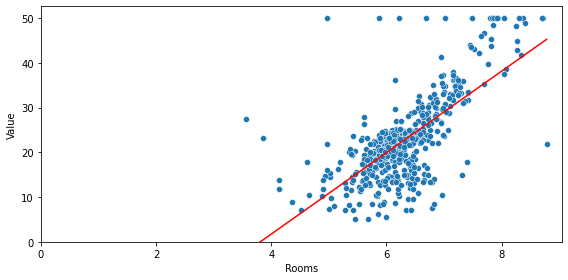

In [13]:
## Haciendo el Grafico

import seaborn as sns
import matplotlib.pyplot as plt

#graficando los puntos
plt.figure(figsize=(8,4),tight_layout=True)
sns.scatterplot(x=x['Rooms'],y=y)

#Graficando la linea
sns.lineplot(x=x['Rooms'],y=y_pred, color='red')

#AxisPlot

plt.xlim(0)
plt.ylim(0)
plt.savefig('Regresion Lineal')
plt.show